In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, cumulative_trapezoid
from scipy import interpolate
import pandas as pd

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
#####################################################
#
# Problema para el calculo de las curvas RTD basado en una funcion de pulso
# Tomado del Hayes
#
# Realizado por
# Ali Gabriel Lara
#
# Fecha: Mayo 2014
# Revision: Ninguna
#
#
## Obtencion de la curva de la concentracion del trazador en funcion del
## tiempo.
# Parametros fijos del problema
#
# Datos de Concentracion del trazador en mol/L vs tiempo en s 
c = np.array([0, 0, 1, 3, 7.4, 9.4, 9.7, 9.4, 8.2, 5, 2.5, 1.2, 0.5, 0.2, 0,]) 
t = np.array([0, 150, 175, 200, 225, 240, 250, 260, 275, 300, 325, 350, 375, 400, 450])
#

# Curva de concentracion del tracer en funcion del tiempo

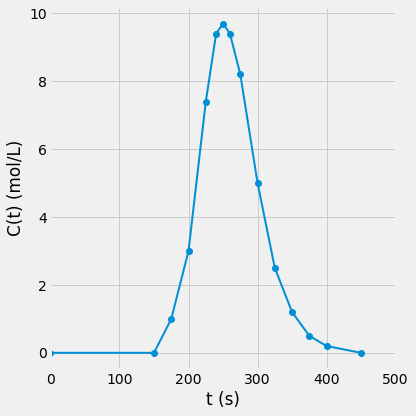

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(t, c, lw=2, marker='o')
ax.set_xlabel('t (s)') 
ax.set_ylabel('C(t) (mol/L)')
ax.set_xlim([0, 500])
plt.tight_layout()
plt.show()

# Calculo de la curva RTD del sistema

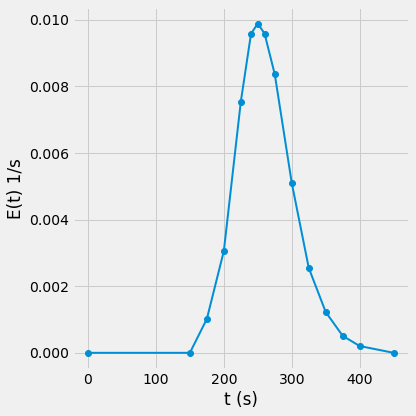

In [5]:
E = c/trapezoid(c, t) 

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(t, E, lw=2, marker='o')
ax.set_xlabel('t (s)') 
ax.set_ylabel('E(t) 1/s')
plt.tight_layout()
plt.show()

# Calculo de la curva de distribucion acumulativa F(t)

In [6]:
F = cumulative_trapezoid(E, t, initial=0) 

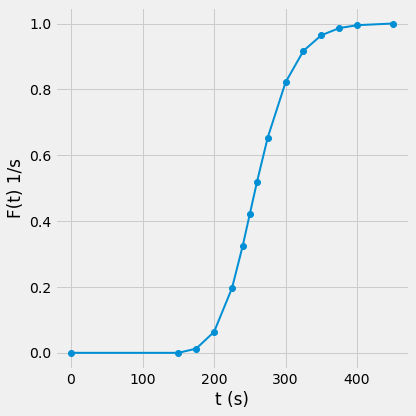

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(t, F, lw=2, marker='o')
ax.set_xlabel('t (s)') 
ax.set_ylabel('F(t) 1/s')
plt.tight_layout()
plt.show()

# Calculo de la curva de W(t)

In [8]:
W = 1 - F 

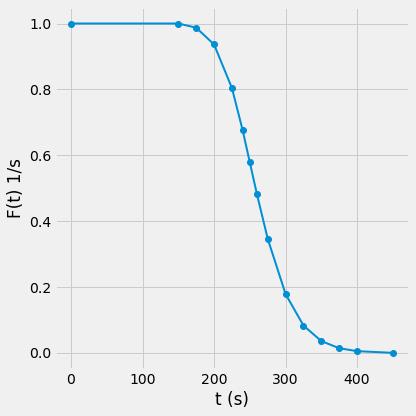

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(t, W, lw=2, marker='o')
ax.set_xlabel('t (s)') 
ax.set_ylabel('F(t) 1/s')
plt.tight_layout()
plt.show()

# Calculo del tiempo medio de residencia

In [10]:
tmean = trapezoid(t*E, t)

print('El tiempo medio de residencia es igual a %.3f s' % tmean) 

El tiempo medio de residencia es igual a 261.615 s


# Calculo de la fraccion de entre 225s y 260s

In [11]:
f = interpolate.interp1d(t, E)

In [12]:
tnew = np.sort(np.insert(t, 1, [230, 270]))
Enew = f(tnew)

In [13]:
datos = np.vstack((tnew, Enew)).T

In [14]:
datos

array([[0.00000000e+00, 0.00000000e+00],
       [1.50000000e+02, 0.00000000e+00],
       [1.75000000e+02, 1.01884870e-03],
       [2.00000000e+02, 3.05654610e-03],
       [2.25000000e+02, 7.53948039e-03],
       [2.30000000e+02, 8.21871285e-03],
       [2.40000000e+02, 9.57717779e-03],
       [2.50000000e+02, 9.88283240e-03],
       [2.60000000e+02, 9.57717779e-03],
       [2.70000000e+02, 8.76209883e-03],
       [2.75000000e+02, 8.35455935e-03],
       [3.00000000e+02, 5.09424350e-03],
       [3.25000000e+02, 2.54712175e-03],
       [3.50000000e+02, 1.22261844e-03],
       [3.75000000e+02, 5.09424350e-04],
       [4.00000000e+02, 2.03769740e-04],
       [4.50000000e+02, 2.71050543e-20]])

In [15]:
mask = np.where((tnew >= 230) & (tnew <= 270))[0]

In [16]:
datos_230_270 = datos[mask]

In [17]:
pd.DataFrame(datos_230_270, columns=['t (s)', 'E(t)'])

,t (s),E(t)
0,230.0,0.008219
1,240.0,0.009577
2,250.0,0.009883
3,260.0,0.009577
4,270.0,0.008762


In [18]:
fraccion = trapezoid(datos_230_270[:, 1], datos_230_270[:, 0])

print('La fraccion es {:.2f}%'.format(fraccion*100))

La fraccion es 37.53%


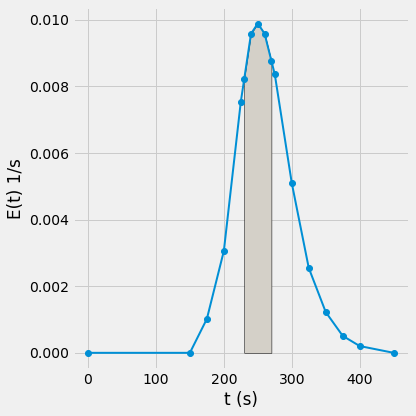

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(tnew, Enew, lw=2, marker='o')
ax.fill_between(datos_230_270[:,0], datos_230_270[:,1],
               fc=[0.831372559070587, 0.815686285495758, 0.7843137383461],
               ec='black')
ax.set_xlabel('t (s)') 
ax.set_ylabel('E(t) 1/s')
plt.tight_layout()
plt.show()